In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt



In [45]:
data = pd.read_json('data.json')
data.columns = ['city', 'early_trips', 'signup', 'driver_rtg', 'surge', 'last_trip', 'phone', 'surge_pct', 'black', 'weekday', 'dist', 'user_rtg']
data.head()

,city,early_trips,signup,driver_rtg,surge,last_trip,phone,surge_pct,black,weekday,dist,user_rtg
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [48]:
data.isnull().sum()

city              0
early_trips       0
signup            0
driver_rtg     8122
surge             0
last_trip         0
phone           396
surge_pct         0
black             0
weekday           0
dist              0
user_rtg        201
dtype: int64

In [49]:
len(data)

50000

In [50]:
no_nulls = data.fillna(data.mean())
no_nulls.isnull().sum()

city             0
early_trips      0
signup           0
driver_rtg       0
surge            0
last_trip        0
phone          396
surge_pct        0
black            0
weekday          0
dist             0
user_rtg         0
dtype: int64

In [51]:
no_nulls['phone'] = no_nulls['phone'].fillna('Neither')

In [52]:
no_nulls.isnull().sum()

city           0
early_trips    0
signup         0
driver_rtg     0
surge          0
last_trip      0
phone          0
surge_pct      0
black          0
weekday        0
dist           0
user_rtg       0
dtype: int64

In [53]:
no_nulls.head()

,city,early_trips,signup,driver_rtg,surge,last_trip,phone,surge_pct,black,weekday,dist,user_rtg
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [57]:
data = no_nulls
for column in data:
    print(type(data[column][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.bool_'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [59]:
data['signup'] = pd.to_datetime(data['signup'])
data['last_trip'] = pd.to_datetime(data['last_trip'])

In [60]:
for column in data:
    print(type(data[column][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.bool_'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [61]:
data.head()

,city,early_trips,signup,driver_rtg,surge,last_trip,phone,surge_pct,black,weekday,dist,user_rtg
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


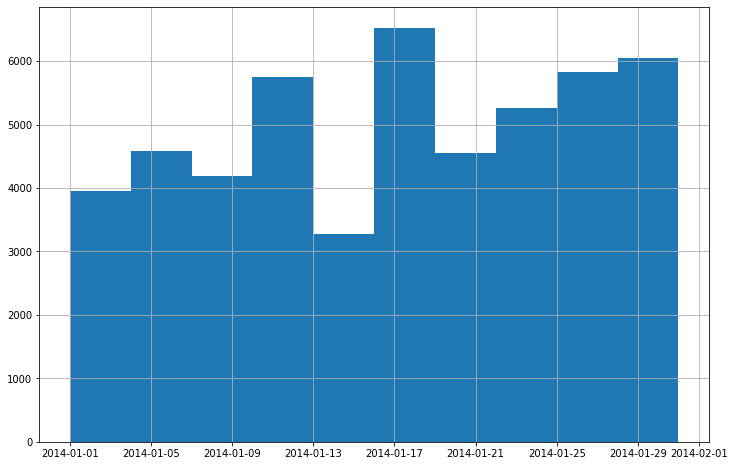

In [63]:
data['signup'].hist()
plt.rcParams["figure.figsize"] = (20,16)
plt.show()

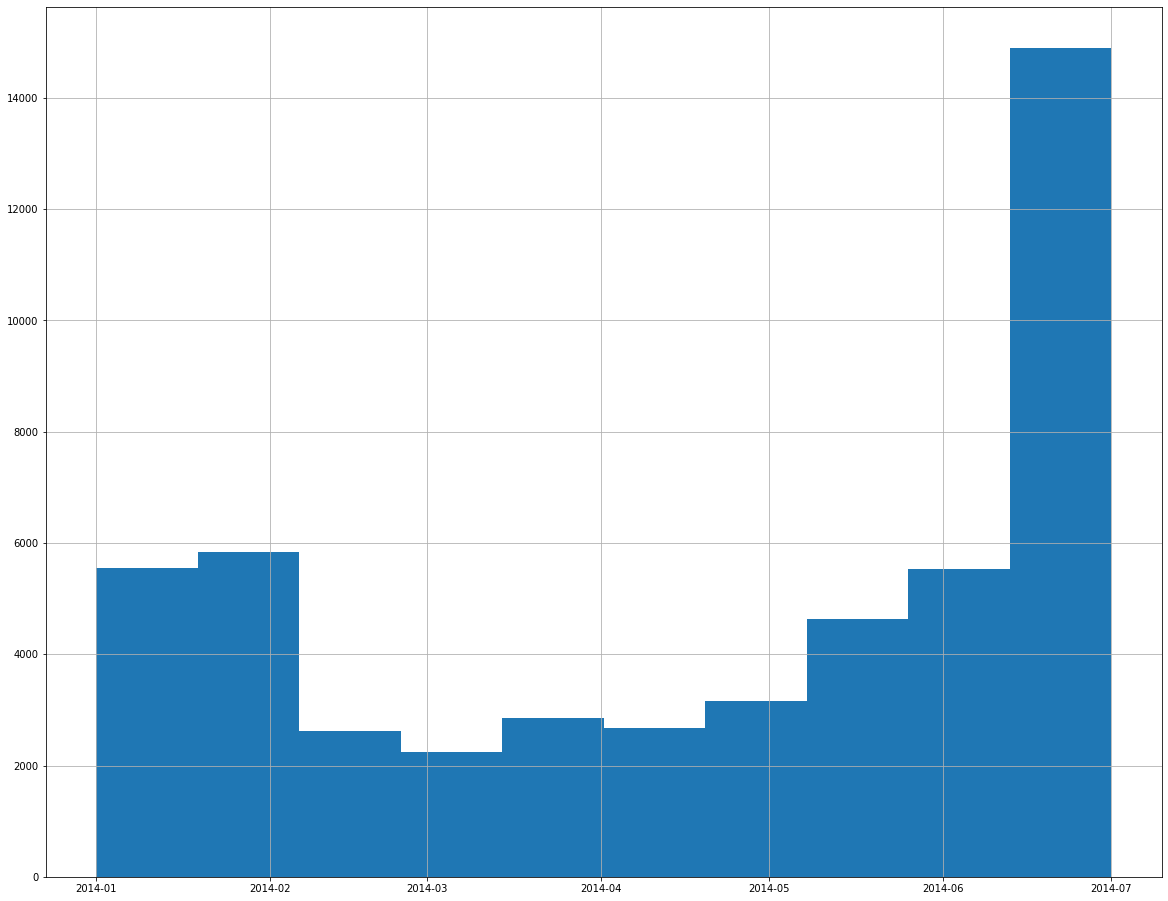

In [64]:
data['last_trip'].hist()
plt.rcParams["figure.figsize"] = (20,16)
plt.show()

In [65]:
max(data['last_trip'])

Timestamp('2014-07-01 00:00:00')

In [68]:
data.loc[data['last_trip'] <= '2014-06-01', 'active?'] = 'False' 
data.loc[data['last_trip'] > '2014-06-01', 'active?'] = 'True' 

In [69]:
data.head(10)

,city,early_trips,signup,driver_rtg,surge,last_trip,phone,surge_pct,black,weekday,dist,user_rtg,active?
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False
8,Winterfell,2,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False
9,Winterfell,1,2014-01-03,4.601559,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False


In [70]:
train = data.sample(frac=0.8, random_state=42)
test = data.drop(train.index)
train.head()

,city,early_trips,signup,driver_rtg,surge,last_trip,phone,surge_pct,black,weekday,dist,user_rtg,active?
33553,Winterfell,1,2014-01-10,3.8,1.00,2014-06-21,iPhone,0.0,True,60.0,3.42,4.7,True
9427,Astapor,0,2014-01-15,4.8,1.00,2014-06-17,iPhone,0.0,True,75.0,3.21,5.0,True
199,Winterfell,0,2014-01-16,5.0,1.00,2014-05-16,iPhone,0.0,False,100.0,4.58,5.0,False
12447,Astapor,2,2014-01-27,5.0,1.50,2014-02-02,Android,50.0,False,0.0,2.94,5.0,False
39489,Astapor,0,2014-01-05,4.8,1.03,2014-05-27,Android,11.1,False,55.6,2.74,4.8,False


In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [78]:
# Conduct a multi-variable (logit?) regression

endog = train[['active?']].astype(float)
exog = train[['early_trips', 'driver_rtg', 'surge']].astype(float)
exog = sm.add_constant(exog, has_constant='add')
train_model = sm.OLS(endog, exog, missing='drop').fit()
print(train_model.summary())

ValueError: could not convert string to float: 'True'